In [1]:
import numpy as np
import pandas as pd
import os
import urllib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

In [3]:
if not os.path.isfile('reviews2.pkl'):
    urllib.request.urlretrieve('https://www.dropbox.com/s/15tfttuzqe7fimg/reviews2.pkl?dl=1','reviews2.pkl')
    
df = pd.read_pickle('reviews2.pkl')    

In [4]:
df.head()

,Reviews,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [5]:
df.Reviews.values[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [6]:
df.shape

(25000, 2)

In [7]:
df.tail()

,Reviews,Sentiment
12495,"Towards the end of the movie, I felt it was to...",0
12496,This is the kind of movie that my enemies cont...,0
12497,I saw 'Descent' last night at the Stockholm Fi...,0
12498,Some films that you pick up for a pound turn o...,0
12499,"This is one of the dumbest films, I've ever se...",0


In [8]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(df.Reviews.values)

In [9]:
tf_vectorizer.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [10]:
len(tf_vectorizer.get_feature_names())

74849

In [11]:
tf_vectorizer = CountVectorizer(min_df=5,stop_words='english')
tf = tf_vectorizer.fit_transform(df.Reviews.values)
len(tf_vectorizer.get_feature_names())

26967

In [12]:
tf.shape

(25000, 26967)

In [13]:
tf

<25000x26967 sparse matrix of type '<class 'numpy.int64'>'
	with 2164624 stored elements in Compressed Sparse Row format>

In [14]:
tf[0].sum()

61

In [15]:
np.random.permutation(10)

array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5])

In [16]:
df.shape[0]

25000

In [17]:
idx = np.random.permutation(len(df))
x_train = tf[idx][:12500].todense()
x_test = tf[idx][12500:].todense()
y_train = df.Sentiment.values[idx][:12500]
y_test = df.Sentiment.values[idx][12500:]

In [18]:
x_train.shape

(12500, 26967)

# Keras Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1

Using Theano backend.


In [20]:
model = Sequential()
model.add(Dense(output_dim=100, input_dim=tf.shape[1], W_regularizer= l2(1e-1)))
model.add(Activation("relu"))
model.add(Dense(output_dim=1, W_regularizer= l2(1e-3)))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=["binary_accuracy"])

/root/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=26967, units=100, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/root/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_regularizer=<keras.reg...)`


In [21]:
model.fit(x_train, y_train, nb_epoch=2, batch_size=128)

/root/miniconda3/lib/python3.6/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2
12500/12500 [==============================] - 80s - loss: 1.0408 - binary_accuracy: 0.7574      

In [41]:
y_test_pred = model.predict(x_test)

In [29]:
y_test_pred

array([[ 0.01545687],
       [ 0.03694999],
       [ 0.33847398],
       ..., 
       [ 0.6553058 ],
       [ 0.95596886],
       [ 0.75690573]], dtype=float32)

In [42]:
y_test_pred[y_test_pred<0.5] = 0
y_test_pred[y_test_pred>=0.5] = 1
np.count_nonzero(y_test_pred==y_test[:,None])*1.0/len(y_test)

0.876

In [35]:
test_case = tf_vectorizer.transform(["I really hated this movie"])
model.predict(test_case.todense())

array([[ 0.40151909]], dtype=float32)

In [36]:
test_case = tf_vectorizer.transform(["I really loved this movie"])
model.predict(test_case.todense())

array([[ 0.6522432]], dtype=float32)

### Improving the model

In [107]:
tfidf_vectorizer = TfidfVectorizer(min_df=5,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df.Reviews.values)
len(tf_vectorizer.get_feature_names())

26967

In [110]:
np.sum(np.square(tfidf[0].todense()))

0.99999999999999967

In [111]:
x_train = tfidf[idx][:12500].todense()
x_test = tfidf[idx][12500:].todense()

In [113]:
model.fit(x_train, y_train, nb_epoch=2, batch_size=128)

Epoch 1/2
12500/12500 [==============================] - 6s - loss: 0.4059 - binary_accuracy: 0.8463     
Epoch 2/2
12500/12500 [==============================] - 5s - loss: 0.1833 - binary_accuracy: 0.9514     


In [114]:
y_test_pred = model.predict(x_test)
y_test_pred[y_test_pred<0.5] = 0
y_test_pred[y_test_pred>=0.5] = 1
np.count_nonzero(y_test_pred==y_test[:,None])/len(y_test)

0.89096

In [115]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_33 (Dense)                 (None, 100)           2696800     dense_input_13[0][0]             
____________________________________________________________________________________________________
activation_33 (Activation)       (None, 100)           0           dense_33[0][0]                   
____________________________________________________________________________________________________
dense_34 (Dense)                 (None, 1)             101         activation_33[0][0]              
____________________________________________________________________________________________________
activation_34 (Activation)       (None, 1)             0           dense_34[0][0]                   
Total params: 2696901
_____________________________________________________________________

In [125]:
pltmodel.get_weights()[0]

array([[ 0.00944713, -0.00318688, -0.00809623, ...,  0.00335867,
        -0.00414377,  0.01001332],
       [ 0.02583803, -0.00786942, -0.01591542, ..., -0.00999653,
         0.02924347,  0.01099609],
       [ 0.00299458,  0.00576433,  0.00566012, ..., -0.00628537,
        -0.00794614, -0.00132258],
       ..., 
       [-0.01323314, -0.01323581,  0.00086141, ...,  0.01116477,
         0.00523074, -0.01231245],
       [ 0.01537368, -0.01984742, -0.02385677, ..., -0.01462397,
         0.00823438,  0.01410121],
       [-0.03280822,  0.0276644 ,  0.01736589, ...,  0.03323051,
        -0.04212286, -0.02399497]], dtype=float32)

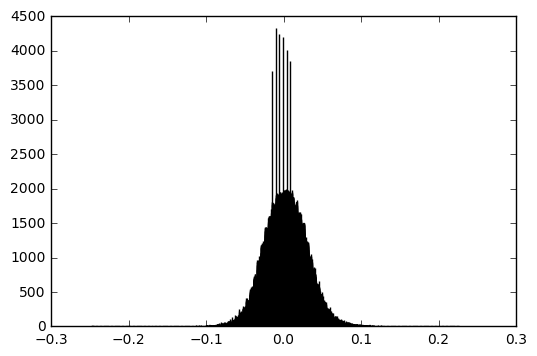

In [128]:
plt.hist(model.get_weights()[0],100)
plt.show()

In [43]:
model.weights

[dense_5_W, dense_5_b, dense_6_W, dense_6_b]